In [1]:
# You need python3.6 for pydicom to work stably
from platform import python_version

print(python_version())

3.6.10


In [2]:
# common packages 
import os
import matplotlib.pyplot as plt
# reading in dicom files
import pydicom

In [3]:
# set path and load 1 Dicom file 
path = './test/'
dataset = pydicom.dcmread(path+'ISIC_0052060.dcm')
for i in dataset:
    print(i)

(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.5962.99.1.7155.4713.1589853456601.1.1.0.0.0
(0008, 0020) Study Date                          DA: '20200519'
(0008, 0023) Content Date                        DA: '20200519'
(0008, 0030) Study Time                          TM: '015736'
(0008, 0033) Content Time                        TM: '015736'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: '"XC"'
(0008, 0070) Manufacturer                        LO: ''
(0008, 0080) Institution Name                    LO: 'ISDIS'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1030) Study Description                   LO: 'ISIC 2020 Grand Challenge image'
(0008, 2218) Anatomic Re

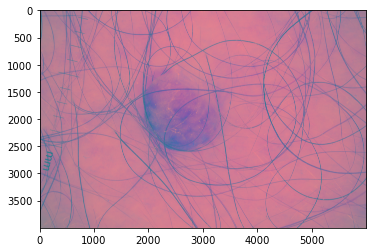

In [4]:
# you can display a dcom image easily with matplotlib
plt.imshow(dataset.pixel_array)
plt.show()

From the metadata, the photometric interpretation is in `YBR_FULL_422` mode. [Photometric interpretation](https://dicom.innolitics.com/ciods/ct-image/image-pixel/00280004#:~:text=The%20value%20of%20Photometric%20Interpretation,of%20the%20image%20pixel%20data.) is an attribute that specifies how the color dimensions of image data are stored. 

For human eyes, the natural mode is `RGB` and not `YBR_FULL_422`, so we should convert DICOM pixel data to `RGB` to visualize what the skin really looks like.

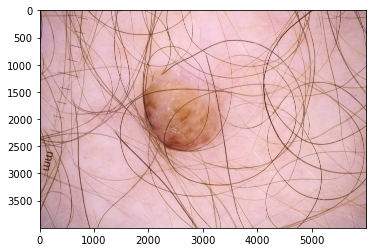

In [5]:
# visualize with RGB instead of YBR_FULL_422 color space
from pydicom.pixel_data_handlers.util import convert_color_space 
convert = convert_color_space(dataset.pixel_array, 'YBR_FULL_422', 'RGB')
plt.imshow(convert)
plt.show()